# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt  

import re

import pickle
from tqdm import tqdm
import os
from collections import Counter

from plotly.offline import iplot
import plotly.graph_objs as go


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from wordcloud import WordCloud, STOPWORDS 

import xgboost as xgb
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#please use below code to load glove vectors 
with open('/content/drive/MyDrive/Colab Notebooks/Assignments/GBDT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [3]:
print("Glove vector dimension : ",model["student"].shape)

Glove vector dimension :  (300,)


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Assignments/datasets/donors_choose/train_data_with_title.csv'

In [5]:
import pandas as pd
data = pd.read_csv(path,nrows=50000)

In [6]:
# append sentiment scores
scores =  [sid.polarity_scores(x) for x in tqdm(data["essay"])]

neg = []
neu = []
pos = []
comp = []
for score in scores:
  neg.append(score["neg"])
  neu.append(score["neu"])
  pos.append(score["pos"])
  comp.append(score["compound"])

data["neu"] = neu
data["compound"] = comp
data["neg"] = neg
data["pos"] = pos

In [9]:
Y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis=1)

<h1>1. GBDT (xgboost/lightgbm) </h1>

# Set 1 - TFIDF

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y,random_state=0)
X_test_org = X_test.copy()

## Response Encoding Categorical Features
school_state ,teacher_prefix ,project_grade_category, project_grade_category, clean_categories


In [12]:
# fit train data and return dictionary
def fit_response_code(X_train, y_train, field_name):
  categories = X_train[field_name].unique()
  cat_counts = dict()


  for cat in categories:
    zero = len(np.where((X_train[field_name]==cat) & (y_train == 0))[0])
    one = len(np.where((X_train[field_name]==cat) & (y_train == 1))[0])
    cat_counts[cat] = (zero,one)

  return cat_counts

# using calculated Dictionary generated using Train data do the response coding
def transform_response_code(x_data, cat_counts, field_name):
  res =[]

  for data_p in x_data[field_name].values:
    res_0, res_1 = cat_counts.get(data_p,(1,1))

    res_0 = res_0/(res_0+res_1)
    res_1 = res_1/(res_0+res_1)

    res.append([res_0,res_1])


  return res

In [13]:
field = "school_state"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_school  = transform_response_code(X_train, cat_counts, field)
X_test_school = transform_response_code(X_test, cat_counts, field)

field = "teacher_prefix"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_teacher  = transform_response_code(X_train, cat_counts, field)
X_test_teacher = transform_response_code(X_test, cat_counts, field)

field = "project_grade_category"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_grade  = transform_response_code(X_train, cat_counts, field)
X_test_grade = transform_response_code(X_test, cat_counts, field)

field = "clean_subcategories"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_clean_subcat= transform_response_code(X_train, cat_counts, field)
X_test_clean_subcat= transform_response_code(X_test, cat_counts, field)

field = "clean_categories"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_clean_cat  = transform_response_code(X_train, cat_counts, field)
X_test_clean_cat = transform_response_code(X_test, cat_counts, field)

## Encoding Numerical Features

In [14]:
# price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [15]:
# teacher_number_of_previously_posted_projects
normalizer1 = Normalizer()
normalizer1.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_proj_norm = normalizer1.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_prev_proj_norm = normalizer1.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_proj_norm = X_train_price_norm.reshape(-1,1)
X_test_prev_proj_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


## TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)


X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

In [17]:
type(X_train_essay_tfidf)

scipy.sparse.csr.csr_matrix

In [18]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_title'].values)


X_train_project_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['project_title'].values)

## Concat DF

In [19]:
def flat(df,field):
  return df[field].values.reshape(-1,1)

In [20]:
X_train_essay_tfidf.shape

(33500, 35441)

In [21]:
flat(X_train,"pos")

array([[0.234],
       [0.278],
       [0.158],
       ...,
       [0.303],
       [0.315],
       [0.242]])

In [22]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_project_title_tfidf,flat(X_train,"neg"),flat(X_train,"neu"),flat(X_train,"pos"),flat(X_train,"compound"),X_train_school,X_train_teacher,X_train_grade,X_train_clean_subcat,X_train_clean_cat,X_train_price_norm,X_train_prev_proj_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_project_title_tfidf,flat(X_test,"neg"),flat(X_test,"neu"),flat(X_test,"pos"),flat(X_test,"compound"),X_test_school,X_test_teacher,X_test_grade,X_test_clean_subcat,X_test_clean_cat,X_test_price_norm,X_test_prev_proj_norm)).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
# print(X_test.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 45057) (33500,)
(16500, 45057) (16500,)


## HyperParam Tuning

In [23]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {
    'n_estimators': [1,5,10,20],
    'max_depth': [3, 5 ,8, 9],
 }
hyp_clf = GridSearchCV(clf_xgb, param_dist,cv=5, scoring = 'roc_auc', return_train_score = True)

In [24]:
hyp_clf.fit(X_tr,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 8, 9],
                         'n_estimators': [1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [25]:
best_depth = hyp_clf.best_estimator_.max_depth
best_n = hyp_clf.best_estimator_.n_estimators
print(best_depth)
print(best_n)

9
20


In [26]:
depth_vals = hyp_clf.cv_results_["param_max_depth"]
n_estimators_vals = hyp_clf.cv_results_["param_n_estimators"]
auc_vals_cv = hyp_clf.cv_results_["mean_test_score"]
auc_vals_train = hyp_clf.cv_results_["mean_train_score"]

In [27]:
trace1 = go.Scatter3d(x=depth_vals,y=n_estimators_vals,z=auc_vals_train, name = 'train')
trace2 = go.Scatter3d(x=depth_vals,y=n_estimators_vals,z=auc_vals_cv, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

## Building Model

In [28]:
best_model = xgb.XGBClassifier(objective = 'binary:logistic',max_depth=best_depth,n_estimators = best_n)

In [29]:
best_model.fit(X_tr, y_train,
        eval_set=[(X_tr, y_train), (X_te, y_test)],
        eval_metric='auc',
        verbose=True)

[0]	validation_0-auc:0.689425	validation_1-auc:0.610828
[1]	validation_0-auc:0.722188	validation_1-auc:0.624429
[2]	validation_0-auc:0.757093	validation_1-auc:0.628942
[3]	validation_0-auc:0.782045	validation_1-auc:0.633644
[4]	validation_0-auc:0.795323	validation_1-auc:0.637966
[5]	validation_0-auc:0.810318	validation_1-auc:0.64425
[6]	validation_0-auc:0.824775	validation_1-auc:0.645122
[7]	validation_0-auc:0.838203	validation_1-auc:0.651925
[8]	validation_0-auc:0.843582	validation_1-auc:0.653433
[9]	validation_0-auc:0.850356	validation_1-auc:0.655554
[10]	validation_0-auc:0.856792	validation_1-auc:0.655317
[11]	validation_0-auc:0.865719	validation_1-auc:0.658545
[12]	validation_0-auc:0.872026	validation_1-auc:0.662967
[13]	validation_0-auc:0.878086	validation_1-auc:0.662697
[14]	validation_0-auc:0.881763	validation_1-auc:0.665439
[15]	validation_0-auc:0.886856	validation_1-auc:0.668377
[16]	validation_0-auc:0.891189	validation_1-auc:0.670785
[17]	validation_0-auc:0.896124	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

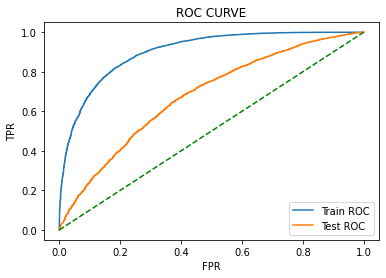

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve
# prob_a return probabilites for both - and + classes, keep only the + class probabilities
fpr_train,tpr_train,thresholds_train = roc_curve(y_train,best_model.predict_proba(X_tr)[:,1])
plt.plot(fpr_train,tpr_train)

fpr_test,tpr_test,thresholds_test = roc_curve(y_test,best_model.predict_proba(X_te)[:,1])
plt.plot(fpr_test,tpr_test)
plt.plot(np.linspace(0,1,20),np.linspace(0,1,20),"g--")

plt.legend(["Train ROC", "Test ROC"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()


In [31]:
auc_score = roc_auc_score(y_test, best_model.predict_proba(X_te)[:,1])
print("AUC Score : ",auc_score)

AUC Score :  0.6779471685831712


## Confusion Matrix

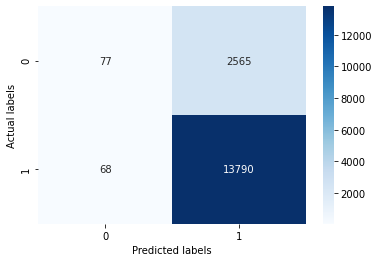

In [32]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
ypred = best_model.predict(X_te)
cfm = confusion_matrix(y_test,ypred)

ax= plt.subplot()
sns.heatmap(cfm, annot=True,fmt='d',cmap='Blues',ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 

# SET 2 - TFIDF W2V


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y,random_state=0)
X_test_org = X_test.copy()

## Response Encoding Categorical Features
school_state ,teacher_prefix ,project_grade_category, project_grade_category, clean_categories


In [34]:
# fit train data and return dictionary
def fit_response_code(X_train, y_train, field_name):
  categories = X_train[field_name].unique()
  cat_counts = dict()


  for cat in categories:
    zero = len(np.where((X_train[field_name]==cat) & (y_train == 0))[0])
    one = len(np.where((X_train[field_name]==cat) & (y_train == 1))[0])
    cat_counts[cat] = (zero,one)

  return cat_counts

# using calculated Dictionary generated using Train data do the response coding
def transform_response_code(x_data, cat_counts, field_name):
  res =[]

  for data_p in x_data[field_name].values:
    res_0, res_1 = cat_counts.get(data_p,(1,1))

    res_0 = res_0/(res_0+res_1)
    res_1 = res_1/(res_0+res_1)

    res.append([res_0,res_1])


  return res

In [35]:
field = "school_state"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_school  = transform_response_code(X_train, cat_counts, field)
X_test_school = transform_response_code(X_test, cat_counts, field)

field = "teacher_prefix"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_teacher  = transform_response_code(X_train, cat_counts, field)
X_test_teacher = transform_response_code(X_test, cat_counts, field)

field = "project_grade_category"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_grade  = transform_response_code(X_train, cat_counts, field)
X_test_grade = transform_response_code(X_test, cat_counts, field)

field = "clean_subcategories"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_clean_subcat= transform_response_code(X_train, cat_counts, field)
X_test_clean_subcat= transform_response_code(X_test, cat_counts, field)

field = "clean_categories"
cat_counts = fit_response_code(X_train,y_train,field)
X_train_clean_cat  = transform_response_code(X_train, cat_counts, field)
X_test_clean_cat = transform_response_code(X_test, cat_counts, field)

## Encoding Numerical Features

In [36]:
# price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [37]:
# teacher_number_of_previously_posted_projects
normalizer1 = Normalizer()
normalizer1.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_proj_norm = normalizer1.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_prev_proj_norm = normalizer1.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_proj_norm = X_train_price_norm.reshape(-1,1)
X_test_prev_proj_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


## TF-IDF W2V

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
def fit_w2v(data):
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(data)
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    return tfidf_words,dictionary

# average Word2Vec
def train_tfdidf_w2v(data,tfidf_words,dictionary):
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(data): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors


In [40]:
from scipy import sparse
tfidf_w, dict_w = fit_w2v(X_train['essay'].values)
X_train_essay_tfidf1 = train_tfdidf_w2v(X_train['essay'].values,tfidf_w,dict_w)
X_test_essay_tfidf1 = train_tfdidf_w2v(X_test['essay'].values,tfidf_w,dict_w)

X_train_essay_tfidf = sparse.csr_matrix(X_train_essay_tfidf1)
X_test_essay_tfidf = sparse.csr_matrix(X_test_essay_tfidf1)

100%|██████████| 16500/16500 [00:37<00:00, 440.83it/s]


In [41]:
X_train_essay_tfidf.shape

(33500, 300)

In [42]:
tfidf_w1, dict_w1 = fit_w2v(X_train['project_title'].values)
X_train_project_title_tfidf1 = train_tfdidf_w2v(X_train['project_title'].values,tfidf_w1,dict_w1)
X_test_project_title_tfidf1 = train_tfdidf_w2v(X_test['project_title'].values,tfidf_w1,dict_w1)

X_train_project_title_tfidf = sparse.csr_matrix(X_train_project_title_tfidf1)
X_test_project_title_tfidf = sparse.csr_matrix(X_test_project_title_tfidf1)

100%|██████████| 16500/16500 [00:00<00:00, 31666.86it/s]


## Concat DF

In [43]:
def flat(df,field):
  return df[field].values.reshape(-1,1)

In [44]:
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_project_title_tfidf,flat(X_train,"neg"),flat(X_train,"neu"),flat(X_train,"pos"),flat(X_train,"compound"),X_train_school,X_train_teacher,X_train_grade,X_train_clean_subcat,X_train_clean_cat,X_train_price_norm,X_train_prev_proj_norm)).tocsr()
X_te1 = hstack((X_test_essay_tfidf,X_test_project_title_tfidf,flat(X_test,"neg"),flat(X_test,"neu"),flat(X_test,"pos"),flat(X_test,"compound"),X_test_school,X_test_teacher,X_test_grade,X_test_clean_subcat,X_test_clean_cat,X_test_price_norm,X_test_prev_proj_norm)).tocsr()


print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
# print(X_test.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 616) (33500,)
(16500, 616) (16500,)


In [45]:
import xgboost as xgb
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## HyperParam Tuning

In [46]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {
    'n_estimators': [1,5,10,20],
    'max_depth': [3, 5 ,8, 9],
 }
hyp_clf = GridSearchCV(clf_xgb, param_dist,cv=5, scoring = 'roc_auc', return_train_score = True)

In [47]:
hyp_clf.fit(X_tr1,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 8, 9],
                         'n_estimators': [1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [60]:
best_depth = hyp_clf.best_estimator_.max_depth
best_n = hyp_clf.best_estimator_.n_estimators

In [61]:
depth_vals = hyp_clf.cv_results_["param_max_depth"]
n_estimators_vals = hyp_clf.cv_results_["param_n_estimators"]
auc_vals_cv = hyp_clf.cv_results_["mean_test_score"]
auc_vals_train = hyp_clf.cv_results_["mean_train_score"]

In [62]:
trace1 = go.Scatter3d(x=depth_vals,y=n_estimators_vals,z=auc_vals_train, name = 'train')
trace2 = go.Scatter3d(x=depth_vals,y=n_estimators_vals,z=auc_vals_cv, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

## Building Model

In [63]:
model = xgb.XGBClassifier(objective = 'binary:logistic',max_depth=best_depth,n_estimators = best_n)

In [64]:
model.fit(X_tr1, y_train,
        eval_set=[(X_tr1, y_train), (X_te1, y_test)],
        eval_metric='auc',
        verbose=True)

[0]	validation_0-auc:0.666569	validation_1-auc:0.62034
[1]	validation_0-auc:0.691775	validation_1-auc:0.632627
[2]	validation_0-auc:0.708774	validation_1-auc:0.639716
[3]	validation_0-auc:0.71966	validation_1-auc:0.647886
[4]	validation_0-auc:0.724746	validation_1-auc:0.651996
[5]	validation_0-auc:0.731686	validation_1-auc:0.65792
[6]	validation_0-auc:0.735741	validation_1-auc:0.658565
[7]	validation_0-auc:0.740293	validation_1-auc:0.659292
[8]	validation_0-auc:0.743467	validation_1-auc:0.660888
[9]	validation_0-auc:0.747734	validation_1-auc:0.662538


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

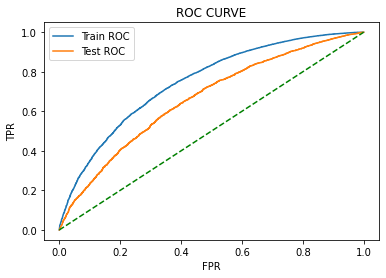

In [65]:
from sklearn.metrics import roc_auc_score,roc_curve
# prob_a return probabilites for both - and + classes, keep only the + class probabilities
fpr_train,tpr_train,thresholds_train = roc_curve(y_train,model.predict_proba(X_tr1)[:,1])
plt.plot(fpr_train,tpr_train)

fpr_test,tpr_test,thresholds_test = roc_curve(y_test,model.predict_proba(X_te1)[:,1])
plt.plot(fpr_test,tpr_test)
plt.plot(np.linspace(0,1,20),np.linspace(0,1,20),"g--")

plt.legend(["Train ROC", "Test ROC"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()


In [66]:
auc_score = roc_auc_score(y_test, model.predict_proba(X_te1)[:,1])
print("AUC Score : ",auc_score)

AUC Score :  0.6625380098935795


## Confusion Matrix

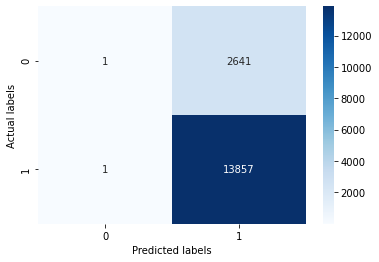

In [67]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
ypred = model.predict(X_te1)
cfm = confusion_matrix(y_test,ypred)

ax= plt.subplot()
sns.heatmap(cfm, annot=True,fmt='d',cmap='Blues',ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 

# <h1>3. Summary</h1>

In [69]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

table.add_row(["TFIDF", "XGBOOST", "max_depth : 5 \n n_estimators: 20 ",  0.6779471685831712])
table.add_row(["TFIDF W2V", "XGBOOST", "max_depth : 5 \n n_estimators: 10 ", 0.6625380098935795])


print(table)

+------------+---------+--------------------+--------------------+
| Vectorizer |  Model  |  Hyper Parameter   |        AUC         |
+------------+---------+--------------------+--------------------+
|   TFIDF    | XGBOOST |   max_depth : 5    | 0.6779471685831712 |
|            |         |  n_estimators: 20  |                    |
| TFIDF W2V  | XGBOOST |   max_depth : 5    | 0.6625380098935795 |
|            |         |  n_estimators: 10  |                    |
+------------+---------+--------------------+--------------------+


In [71]:
!jupyter nbconvert --to html "/content/11_Assignment_GBDT_Instructions (1).ipynb"

[NbConvertApp] Converting notebook /content/11_Assignment_GBDT_Instructions (1).ipynb to pdf
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'text/html'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Support files will be in 11_Assignment_GBDT_Instructions (1)_files/
[NbConvertApp] Making directory ./11_Assignment_GBDT_Instructions (1)_files
[NbConvertApp] Making directory ./11_Assignment_GBDT_Instructions (1)_files
[NbConvertApp] Making directory ./11_Assignment_GBDT_Instructions (1)_files
[NbConvertApp] Making directory ./11_Assignment_GBDT_Instructions (1)_files
[NbConvertApp] Writing 109307 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(J